## Metody Nieparametryczne w Statystyce
# Zadanie 7
Za pomocą odpowiednich symulacji zbadać odsetek odrzuceń prawdziwej hipotezy głównej (tzn. błąd I rodzaju) w teście istotności współczynnika korelacji w przypadku, gdy dane pochodzą z rozkładu o grubych ogonach (np. 𝑡-Studenta o różnych stopniach swobody). W trakcie symulowania danych należy pamiętać, by dane spełniały hipotezę główną.

### autor: Maciej Komosa

1. Importowanie potrzebnych bibliotek.

In [1]:
import numpy as np, pandas as pd
from scipy.stats import pearsonr, spearmanr, t
from tqdm import tqdm
import matplotlib.pyplot as plt

2. Badanie odsetków odrzuceń prawdziwej hipotezy głównej dla danych z rozkładu t-Studenta.

pearson test


100%|██████████| 140/140 [01:06<00:00,  2.10it/s]


spearman test


100%|██████████| 140/140 [00:46<00:00,  3.00it/s]


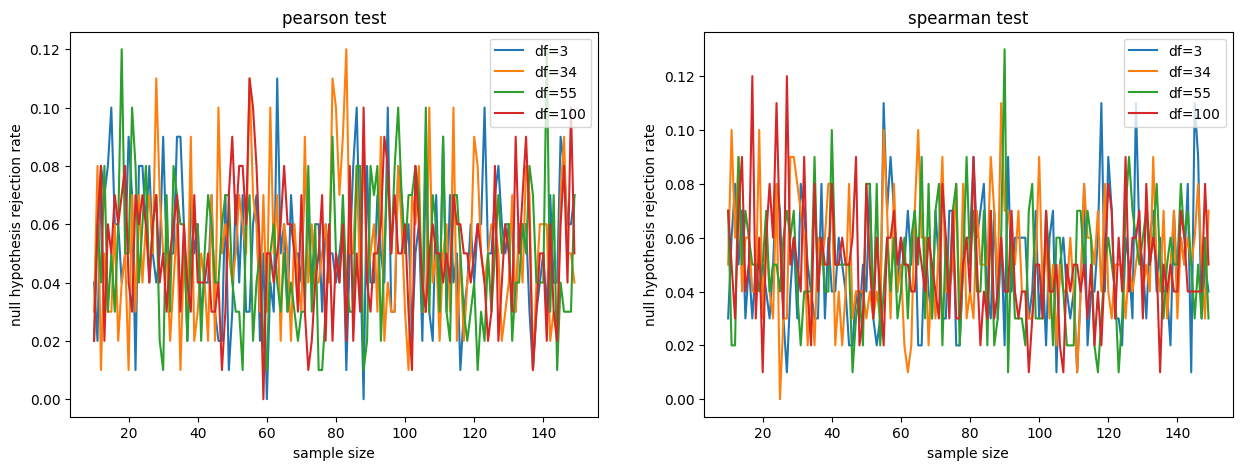

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

for k in range(0, 2):    
    results = pd.DataFrame(columns=["df=3", "df=34", "df=55", "df=100"])
    buf = []
    print("pearson test" if k == 0 else "spearman test")
    for n in tqdm(range (10, 150)):
        for i in range (0, 100):
            for df in [3, 34, 55, 100]:
                #generowanie dwóch wektorów liczbowych z rozkładu normalnego
                x1 = t.rvs(size=n, df=df)
                x2 = t.rvs(size=n, df=df)
                
                #testy na istotność współczynnika korelacji
                if k == 0:
                    buf.append(pearsonr(x1, x2)[1] < 0.05)
                else:
                    buf.append(spearmanr(x1, x2)[1] < 0.05)

        results.loc[n] = [np.mean(buf[0::4]), np.mean(buf[1::4]), np.mean(buf[2::4]), np.mean(buf[3::4])]
        buf.clear()
    results.plot(title="pearson test" if k == 0 else "spearman test", ax = axes[k],
                xlabel="sample size", ylabel="null hypothesis rejection rate")